# Practice 7: Contour confidence using $\Delta \chi^2$

## Course: "Métodos Estadísticos y Numéricos en Cosmología"

##### Rafael Morales Moreno, Maestría en Ciencias (Física), IF-UNAM

## Ex. 1: $\chi^2$ and $\Delta \chi^2$

The idea of this exercise is to find the best parameters of a linear regression $f(x) = Ax + B$ where $A$ and $B$ are the 2 parameters of your model. You will first find the best parameters using a $\chi^2$ estimator; then you will check the p-value of your best fit before to use the $\Delta \chi^2$ method to derive the confidence contours and the 1D marginalized probability distribution for $A$ and $B$. The exercise is divided in 3 parts : Visualization of the data, Best fit parameters and confidence contour:

### 1.1 Visualization of the data

1) Read the file *'Points_chi2_example_cov.txt’* which contain X and Y array (10 points each array)

2) Read the file *'Covariance_chi2_example_cov.txt’* which contain covariance matrix. In this example you will see that the off-diagonal terms of the covariance matrix are null. So the error bars you will plot are the real error bars.

3) Plot Y vs X with marker and no line. Do a pcolormesh of the covariance matrix.

4) Use the diagonal terms of the covariance matrix as the variance of each 10 Y points and do the same plot as in 3) but including the error bars (have to be the square root of the variance ;) ). We recommand to use **plt.errorbar**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Importing txt files of points and covariance

filename_points = 'Points_chi2_example_cov.txt'
data_points = np.loadtxt(filename_points, skiprows=0, dtype=float)

filename_cov = 'Covariance_chi2_example_cov.txt'
data_cov = np.loadtxt(filename_cov, skiprows=0, dtype=float)

print(data_points.shape, '\n', data_cov.shape) # there are 10 points w/ x,y coordinates /// 10x10 matrix

(10, 2) 
 (10, 10)


In [4]:
X = data_points[:,0]
Y = data_points[:,1]

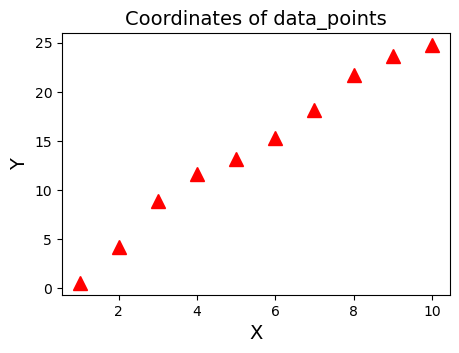

In [111]:
plt.plot(X,Y, color='red', marker="^", linestyle = 'None', markersize=10)
plt.title('Coordinates of data_points', fontsize=14)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.rcParams["figure.figsize"] = (5,3.4)
plt.show()

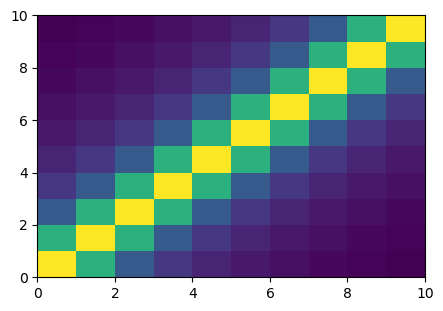

In [112]:
plt.pcolormesh(data_cov)     # plt.pcolormesh([X, Y,] data_cov)
plt.show()

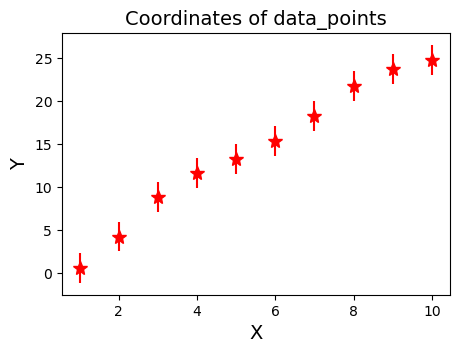

In [113]:
# 4. Using the diagonal terms of the cov. matrix as the variance of each 10 Y pts
# & do the same plot as in 3) but including the error bars

error_bars = np.sqrt(np.diag(data_cov)) # Taking the sqrt of the diag. terms of data_cov

plt.errorbar(X,Y, error_bars, color='red', marker="*", linestyle = 'None', markersize=10)
plt.title('Coordinates of data_points', fontsize=14)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.show()

### 1.2 Find best fit parameters

5) Create 2 arrays, named **A_arr** and **B_arr**, of values spaced by 0.1 between -5 and 5

5) (bis) Create a Covariance matrix that only contain the diagonal part of the real covariance matrix that we can name here *CovD*. It will allow to do the same work but ignoring the covariance between the data points.

6) Generate a 2D-array, named **chi2_arr**, full of 0 with size **(len(A_arr), len(B_arr))**. Generate another identical 2D-array, named **chi2_arr_diag**.

7) Using a double loop, evaluate at each point of the **chi2_arr[ii,jj]** the value of the $χ^2 = \frac{1}{2} \vec{V}^T Cov^{−1}\vec{V}$ where $\vec{V}$ is the array of 10 elements (**A_arr[ii] ∗ X + B_arr[jj] - Y**)

7) (bis) Using a double loop, evaluate at each point of the **chi2_arr_diag[ii,jj]** the value of the $χ^2_D = \frac{1}{2} \vec{V}^T Cov^{−1}_D \vec{V}$ where $Cov_D$ is the diagonal of the covariance matrix generated in 5 bis)

8) Find the best fit parameters ($A_{best}$, $B_{best}$) which correspond to the minimum of **chi2_arr**. What is the value of this best $χ^2/N_{dof}$ ? Is it acceptable?

8) (bis) Find the best fit parameters ($A^D_{best}$, $B^D_best$) which correspond to the minimum of **chi2_arr_diag**.

9) Plot one more time X,Y with **errorbar()** and add the best fit model using the whole covariance matrix information and the best fit model using only the diagonal of the covariance matrix.

In [8]:
A_arr = B_arr = np.arange(-5,5, 0.1)
Cov_D = np.zeros((data_cov.shape))

for i in range(data_cov.shape[0]):
    for j in range(data_cov.shape[1]):
        if i == j:
            Cov_D[i,j] = data_cov[i,j]
Cov_D

array([[3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

In [9]:
chi2_arr = np.zeros((len(A_arr),len(B_arr)))
chi2_arr_diag = np.zeros((len(A_arr),len(B_arr)))

for i in range(len(A_arr)):
    for j in range(len(B_arr)):
        chi2_arr[i,j]=(1/2)*np.dot((A_arr[i]*X+B_arr[j] - Y).T,np.dot(np.linalg.inv(data_cov),(A_arr[i]*X+B_arr[j] - Y)))
chi2_arr

array([[1526.29909648, 1521.77344643, 1517.25756561, ..., 1132.79660937,
        1129.21857532, 1125.65031051],
       [1489.24597211, 1484.77405286, 1480.31190284, ..., 1100.95537302,
        1097.43106977, 1093.91653576],
       [1452.6497057 , 1448.23151725, 1443.82309804, ..., 1069.57099464,
        1066.1004222 , 1062.63961899],
       ...,
       [  59.27673363,   59.96297161,   60.65897881, ...,  171.32738517,
         172.96123915,  174.60486237],
       [  66.53883221,   67.27880099,   68.028539  , ...,  183.80137178,
         185.48895656,  187.18631058],
       [  74.25778875,   75.05148833,   75.85495715, ...,  196.73221635,
         198.47353193,  200.22461676]])

In [10]:
# 7) bis
for i in range(len(A_arr)):
    for j in range(len(B_arr)):
        chi2_arr_diag[i,j]=(1/2)*(1/2)*np.dot((A_arr[i]*X + B_arr[j] - Y).T, np.dot(np.linalg.inv(Cov_D),(A_arr[i]*X + B_arr[j] - Y)))
chi2_arr_diag

array([[2221.981007  , 2214.20717044, 2206.45000055, ..., 1545.51886124,
        1539.36169135, 1533.22118813],
       [2168.95540964, 2161.27323975, 2153.60773653, ..., 1501.38493056,
        1495.31942733, 1489.27059078],
       [2116.57147896, 2108.98097573, 2101.40713918, ..., 1457.89266653,
        1451.91882998, 1445.96166009],
       ...,
       [  66.09806369,   67.2158938 ,   68.35039058, ...,  252.1275846 ,
         254.86208138,  257.61324483],
       [  75.314133  ,   76.52362978,   77.74979323, ...,  270.23532058,
         273.06148403,  275.90431414],
       [  85.17186898,   86.47303243,   87.79086254, ...,  288.98472323,
         291.90255334,  294.83705012]])

In [11]:
# 8) Finding the best fit params as the correspongind indices of the min. of chi2
indices_ABmin = np.where( chi2_arr == np.min(chi2_arr))

A_best = A_arr[indices_ABmin[0][0]]
B_best = B_arr[indices_ABmin[1][0]]
print(' A_best =', A_best, '\n B_best =', B_best, '\n corresponding to the indices', indices_ABmin)

 A_best = 2.6999999999999726 
 B_best = -1.0000000000000142 
 corresponding to the indices (array([77]), array([40]))


In [12]:
# 8) bis: Doing the same now for the diag. cov.
indices_ABminD = np.where( chi2_arr_diag == np.min(chi2_arr_diag))

A_bestD = A_arr[indices_ABminD[0][0]]
B_bestD = B_arr[indices_ABminD[1][0]]
print(' A^D_best =', A_bestD, '\n B^D_best =', B_bestD, '\n corresponding to the indices', indices_ABminD)

 A^D_best = 2.6999999999999726 
 B^D_best = -0.7000000000000153 
 corresponding to the indices (array([77]), array([43]))


$\chi^2  \ \Rightarrow \ N_{dof} = N_{pts} - N_{params}$

$\Delta \chi^2 \ \Rightarrow  \ N_{dof} = N_{params}$

In [13]:
N_dof = len(X) - 2 # num. of degrees of freedom is the # of observations - # fitted params.
np.min(chi2_arr)/2

1.029907940347452

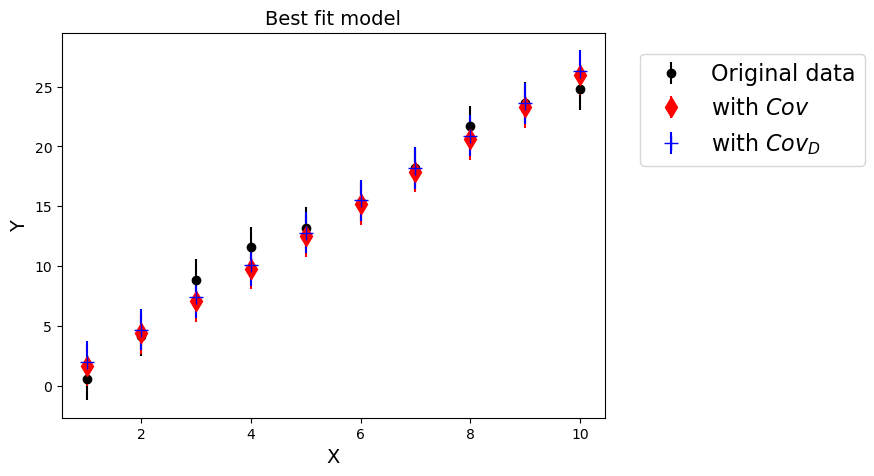

In [116]:
error_bars_whole = np.sqrt(data_cov) # Taking the sqrt of the whole cov
error_bars_diag = np.sqrt(Cov_D)

f = A_best*X + B_best
f_D = A_bestD*X + B_bestD

plt.errorbar(X,Y, error_bars, color='black', marker="o", linestyle = 'None', markersize=6, label=r'Original data')
plt.errorbar(X, f, error_bars, color='red', marker="d", linestyle = 'None', markersize=10, label=r'with $Cov$')
plt.errorbar(X, f_D, error_bars, color='blue', marker="+", linestyle = 'None', markersize=10, label=r'with $Cov_D$')

plt.legend(loc='right',bbox_to_anchor=(1.5, 0.8), fontsize=16)
plt.title('Best fit model', fontsize=14)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

### 1.3 Confidence contours

One time you have found the best fit, you want to obtain the confidence region. To do that, you have to considerate the $∆χ^2 = χ^2 − min(χ^2)$ and consider the values for 2 parameters for 1, 2, 3σ.

10) Generate a new 2D array, named **Delta_chi2_arr**, equal to **chi2_arr-np.min(chi2_arr)** and another one for the diagonal information **Delta_chi2_arr_diag**, equal to **chi2_arr_diag-np.min(chi2_arr_diag)**

11) Do a **pcolormesh** of these new arrays and add a marker at the best parameters value position for both.

12) Using the values for 2 parameters for 1, 2, 3σ, generate the contour plot for these 3 values for the whole information and the diagonal information. The real values we used to generate the data points are **A_real= 2.7** and **B_real = -2.3**. Add a marker on the contour plot.

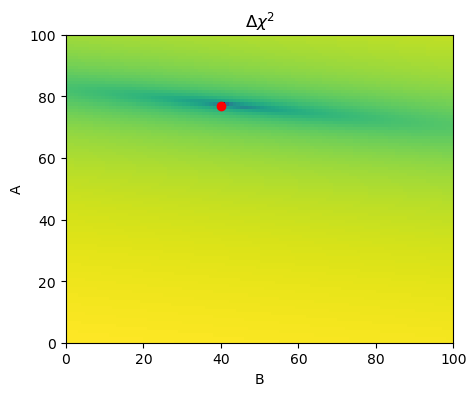

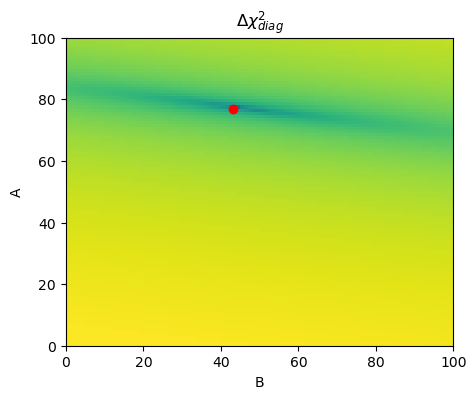

In [143]:
Delta_chi2_arr = chi2_arr - np.min(chi2_arr)
Delta_chi2_arr_diag = chi2_arr_diag - np.min(chi2_arr_diag)

plt.pcolormesh(np.log(Delta_chi2_arr + 1e-6))     # plt.pcolormesh([X, Y,] data_cov)
plt.rcParams["figure.figsize"] = (5,4)
plt.scatter(indices_ABmin[1][0], indices_ABmin[0][0],color='r',label=r'Best fit value')
plt.title(r'$\Delta \chi^2$')
plt.xlabel('B')
plt.ylabel('A')
plt.show()

plt.pcolormesh(np.log(Delta_chi2_arr_diag + 1e-6))
plt.scatter(indices_ABminD[1][0], indices_ABminD[0][0],color='r',label=r'Best fit value')
plt.title(r'$\Delta \chi^2_{diag}$')
plt.xlabel('B')
plt.ylabel('A')
plt.show()

In [17]:
sigma_diag = 1/np.sqrt(np.linalg.inv(Cov_D))
np.linalg.inv(Cov_D)

/tmp/ipykernel_27041/27883483.py:1: RuntimeWarning: divide by zero encountered in true_divide
  sigma_diag = 1/np.sqrt(np.linalg.inv(Cov_D))


array([[0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [18]:
A_real = 2.7; B_real = -2.3
Y_real = A_real*X + B_real

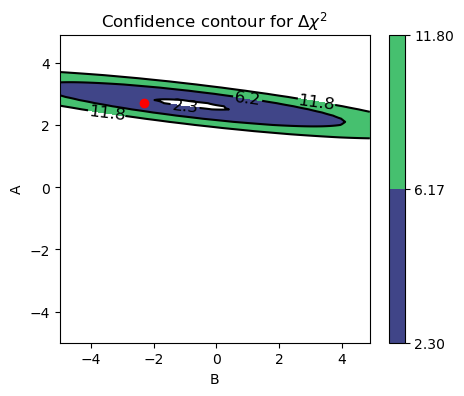

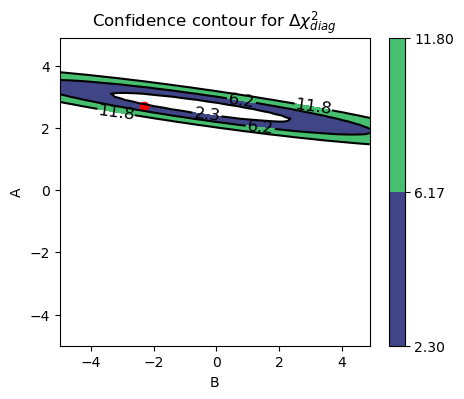

In [124]:
x,y = np.meshgrid(A_arr, B_arr)

plt.figure()
levels = [2.3, 6.17, 11.8]
contour = plt.contour(x, y, chi2_arr, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(x, y, chi2_arr, levels)
plt.colorbar(contour_filled)
plt.title('Confidence contour for $\Delta \chi^2$')
plt.xlabel('B')
plt.ylabel('A')
plt.scatter(B_real, A_real,color='r',label=r'Real value')
plt.show()

plt.figure()
levels = [2.3, 6.17, 11.8]
contour = plt.contour(x, y, chi2_arr_diag, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(x, y, chi2_arr_diag, levels)
plt.colorbar(contour_filled)

plt.title('Confidence contour for $\Delta \chi^2_{diag}$')
plt.xlabel('B')
plt.ylabel('A')
plt.scatter(B_real, A_real,color='r',label=r'Real value')
plt.show()

13) Do the real values for A and B are in the confidence contours for the whole information analysis? Same question for the diagonal analysis.

**R. The real values fall inside the 2$\sigma$ confidence contour for both cases, respectively.**

## 2 Exercise: Calculate p-values for distinct $χ^2$

You will generate the probability distribution function, using the gamma and incomplete gamma functions, for the $χ^2$ for different number of degree of freedom. Calculate the p-values for the corresponding best $χ^2$ values, which correspond to results we get in our last analysis:

1) $χ^2 = 25.1$ for $N_{dof}=16$

2) $χ^2 =25.0$ for $N_{dof}=18$

3) $χ^2 =41.5$ for $N_{dof}=20$

4) $χ^2 =30.3$ for $N_{dof}=23$

5) $χ^2 =28.1$ for $N_{dof}=25$

6) $χ^2 =60.1$ for $N_{dof}=33$.

 

We know that the cumulative distribution function $P_k$ of a pdf $p_k$ with $N_{dof} = k$ degrees of freedom and values of $\chi^2 = s$ is given by

$$
    P_k(Y \leq s) = \frac{\gamma(k/2, s/2)}{\Gamma(k/2)}.
$$

In [135]:
k1=16; k2=18; k3=20; k4=23; k5=25; k6=33
chi2_1=25.1; chi2_2=25; chi2_3=41.5; chi2_4=30.3; chi2_5=28.1; chi2_6=60.1

import scipy as sp
from scipy import special

P1 = sp.special.gammainc(k1/2, chi2_1/2)
P2 = sp.special.gammainc(k2/2, chi2_2/2)
P3 = sp.special.gammainc(k3/2, chi2_3/2)
P4 = sp.special.gammainc(k4/2, chi2_4/2)
P5 = sp.special.gammainc(k5/2, chi2_5/2)
P6 = sp.special.gammainc(k6/2, chi2_6/2)

print('The CDF are respectively \n P1 =', P1,'\n \n P2 =',P2,'\n\n P3 =',P3,'\n\n P4 =',P4,'\n\n P5 =',P5,'\n\n P6 =',P6)

The CDF are respectively 
 P1 = 0.9319181574825899 
 
 P2 = 0.8750838030553295 

 P3 = 0.9967884952135365 

 P4 = 0.8590180518014623 

 P5 = 0.696729713915238 

 P6 = 0.9973031897321615


Now, what we have to compute is the integral of this CDF form 0 to *chi2_n* as

$$
    I = \int_0 ^{\chi_{measured}} pdf(\chi^2) d\chi^2,
$$
but, in fact, the previous $P(k/2, \chi^2/2)$ is indeed the CDF yet, so, we can do directly the substraction due to the p-values will be given by $$p_{-value} = 1 - I $$.

In [136]:
# Finally, the p-values are, respectively

p_val1 = 1 - P1; p_val2 = 1 - P2; p_val3 = 1 - P3; p_val4 = 1 - P4; p_val5 = 1 - P5; p_val6 = 1 - P6

print('The corresponding p-values are \n\n p-val1 =', p_val1, '\n \n p-val2 =', p_val2, '\n\n p-val3 =', p_val3, '\n\n p-val4 =', p_val4, '\n\n p-val5 =', p_val5, '\n\n p-val6 =', p_val6)

The corresponding p-values are 

 p-val1 = 0.06808184251741012 
 
 p-val2 = 0.12491619694467049 

 p-val3 = 0.0032115047864634816 

 p-val4 = 0.1409819481985377 

 p-val5 = 0.30327028608476203 

 p-val6 = 0.002696810267838523
